In [2]:
import pandas as pd
import numpy as np
import os
import glob
os.chdir('/data6/Angelo/alexcc/AngeloStrainsPaper/manuscript_materials/soil_popgen/notebooks')

In [9]:
high_fst = pd.read_table('../data_tables/high_fst.data', sep="\t")

from collections import defaultdict
loci = defaultdict(list)

last_scaf = ''
last_orf = -1
last_locus = -1

for index, row in high_fst.iterrows():
    locus= row['genome'] + ":" + str(row['locus_num'])
    if row['gene'] not in loci[locus]:
        loci[locus].append(row['gene'])
        scaf = "_".join(row['gene'].split("_")[:-1])
        orf = int(row['gene'].split("_")[-1])
    
        # Fill in missing genes
        if last_locus == locus:
            if last_scaf == scaf and last_orf < orf - 1:
                for i in range(last_orf+1,orf):
                    loci[locus].append(scaf + "_" + str(i))
                    
    last_orf = orf
    last_locus = locus
    last_scaf =scaf

In [10]:
import glob
from Bio import SeqIO

genomes = {}
regions = {}
for l in loci:
    regions[l] = []

for fn in glob.glob('../representative_genomes/fna/*.fna'):
    for record in SeqIO.parse(fn, 'fasta'):
        gene = str(record.id)
        scaf = "_".join(gene.split("_")[:-1])
        orf = int(gene.split("_")[-1])
        start = int(record.description.split("#")[1].strip())
        stop = int(record.description.split("#")[2].strip())
        strand = record.description.split("#")[3].strip()
        if strand == '1':
            strand = '+'
        else:
            strand = '-'

        for l in loci:
            for gene2 in loci[l]:
                if gene2 == gene:
                    regions[l].append([gene, scaf, orf, start, stop, strand])
                    break

In [13]:
good = ['14_0927_05_20cm_Bacteria_2135_68_10_2','14_0927_05_20cm_Bacteria_2135_68_10_2','14_0927_12_40cm_Bacteria_6527_55_8_1','14_0927_12_40cm_Bacteria_6527_55_8_1','14_0929_02_20cm_Deltaproteobacteria_2457_55_9_1','14_0929_02_20cm_Deltaproteobacteria_2457_55_9_1','14_0929_02_20cm_Deltaproteobacteria_2457_55_9_4','14_0929_02_20cm_Deltaproteobacteria_2457_55_9_4','14_0929_02_40cm_Rokubacteria_2807_70_29_1','14_0929_02_40cm_Rokubacteria_2807_70_29_1','14_0929_02_40cm_Rokubacteria_2807_70_29_1','14_0929_02_40cm_Rokubacteria_2807_70_29_1','14_0929_02_40cm_Rokubacteria_2807_70_29_3','14_0929_02_40cm_Rokubacteria_2807_70_29_3','14_0929_02_40cm_Rokubacteria_2807_70_29_3','14_0929_02_40cm_Rokubacteria_2807_70_29_3','14_0929_09_20cm_Bacteria_6721_56_10_3','14_0929_09_20cm_Bacteria_6721_56_10_3','14_0929_09_30cm_Armatimonadetes_6837_65_8_3','14_0929_09_30cm_Armatimonadetes_6837_65_8_3','14_0929_12_30cm_Bacteria_7383_54_8_1','14_0929_12_30cm_Bacteria_7383_54_8_1','14_1009_16_30cm_Bacteria_10556_58_16_8','14_1009_16_30cm_Bacteria_10556_58_16_8']

/home/alexcc/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


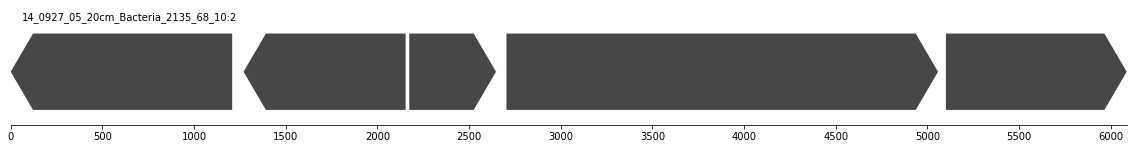

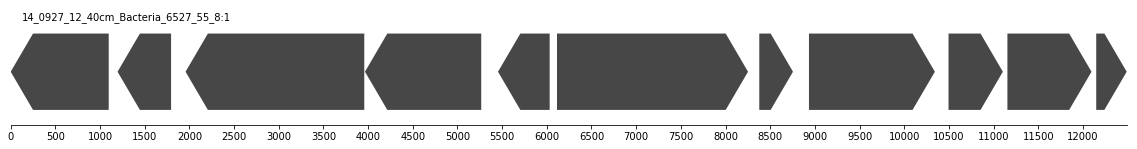

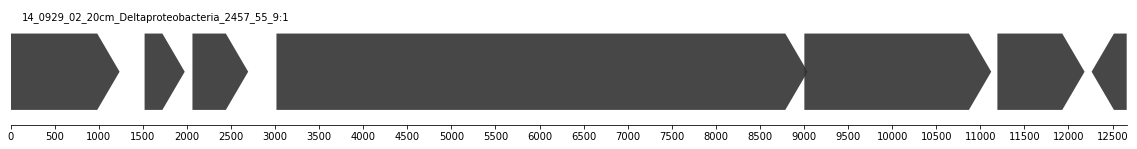

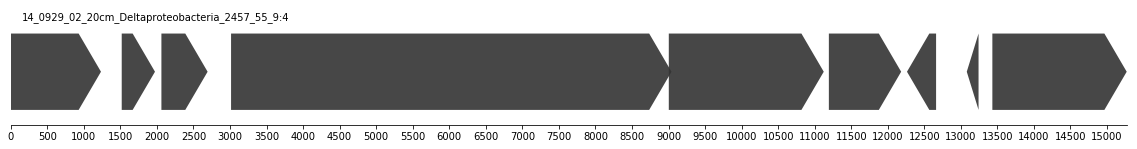

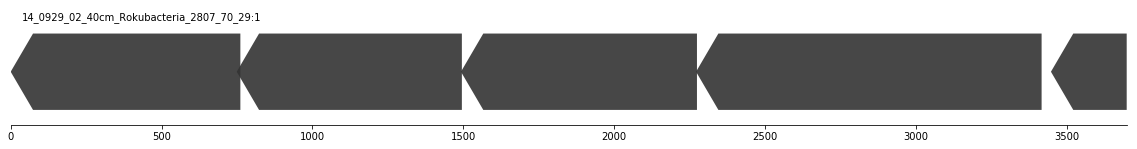

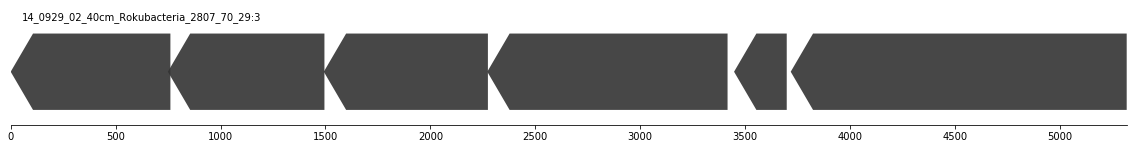

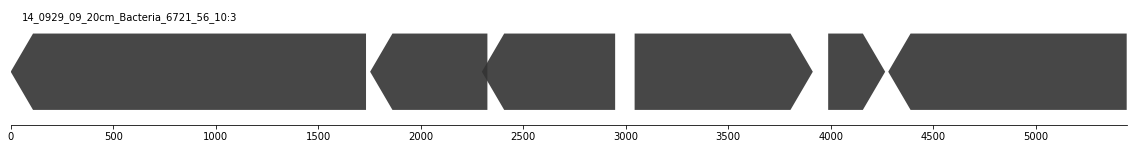

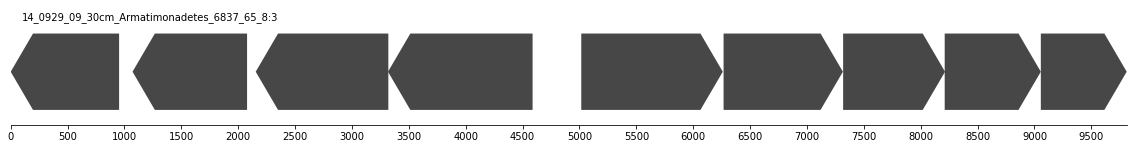

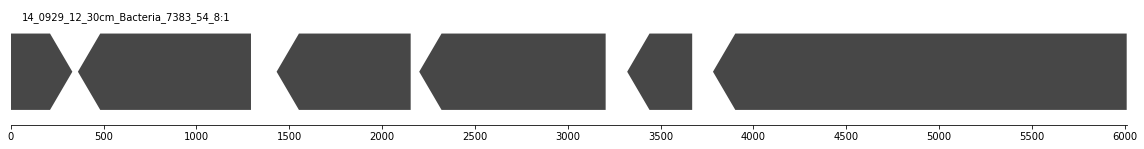

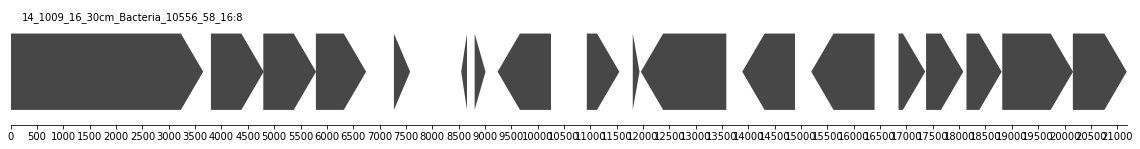

In [19]:
import genome_browser as gb
import numpy as np
i = 0
for region in regions:
    if region.replace(":","_") in good:
        g = gb.GenomeDiagram()


        track = gb.Feature(region, height_ratio=0.01)
        for gene in regions[region]:
         # Feature must follow iterable as (position, width, strand, color)

            track.add_feature([gene[3],
                                gene[4] - gene[3],
                                gene[5],
                                color])
        g.add_track(track)


        fig, axes = g.draw()
        fig.show()
        fig.savefig('./' + region + "_LOCUS.pdf", bbox_inches='tight')

    #     i += 1
    #     if i > 3:
    #         break

In [24]:
for region in regions:
    if region.replace(":","_") in good:
        for scaf in regions[region]:
            
            print(region + "," + str(scaf[0]) + "," + str(scaf[3]))

14_0927_05_20cm_Bacteria_2135_68_10:2,14_0927_05_20cm_scaffold_503_17,13197
14_0927_05_20cm_Bacteria_2135_68_10:2,14_0927_05_20cm_scaffold_503_18,14467
14_0927_05_20cm_Bacteria_2135_68_10:2,14_0927_05_20cm_scaffold_503_19,15371
14_0927_05_20cm_Bacteria_2135_68_10:2,14_0927_05_20cm_scaffold_503_20,15901
14_0927_05_20cm_Bacteria_2135_68_10:2,14_0927_05_20cm_scaffold_503_21,18298
14_0927_12_40cm_Bacteria_6527_55_8:1,14_0927_12_40cm_scaffold_4891_20,20764
14_0927_12_40cm_Bacteria_6527_55_8:1,14_0927_12_40cm_scaffold_4891_21,21960
14_0927_12_40cm_Bacteria_6527_55_8:1,14_0927_12_40cm_scaffold_4891_22,22721
14_0927_12_40cm_Bacteria_6527_55_8:1,14_0927_12_40cm_scaffold_4891_23,24729
14_0927_12_40cm_Bacteria_6527_55_8:1,14_0927_12_40cm_scaffold_4891_24,26218
14_0927_12_40cm_Bacteria_6527_55_8:1,14_0927_12_40cm_scaffold_4891_25,26878
14_0927_12_40cm_Bacteria_6527_55_8:1,14_0927_12_40cm_scaffold_4891_26,29142
14_0927_12_40cm_Bacteria_6527_55_8:1,14_0927_12_40cm_scaffold_4891_27,29698
14_0927_12_4

### 